In [1]:
# import required libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv(r'C:\Users\ABHISHEK NANDAN\Desktop\sem-5\Sem-5 Labs\AI Lab\Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


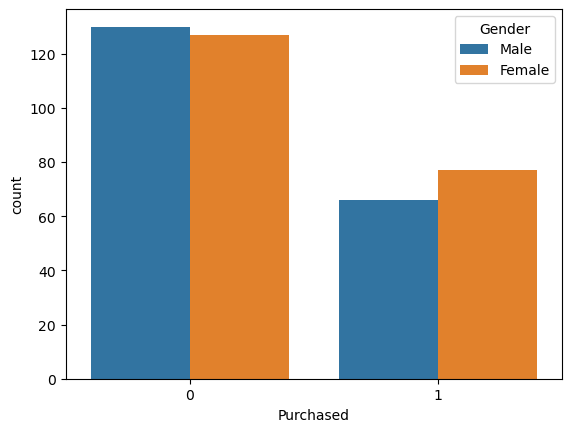

In [3]:
sns.countplot(x='Purchased', data=data, hue='Gender')
plt.show()

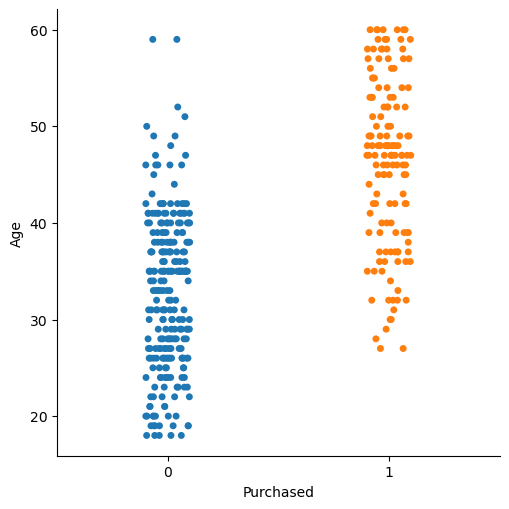

In [4]:
sns.catplot(x='Purchased', y='Age', data=data)
plt.show()

In [5]:
data['Purchased'].unique()

array([0, 1], dtype=int64)

In [6]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
# encoding gender (categorical data into numerical)
le= LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [9]:
# splitting data
x=data.iloc[:, 1:4]
y=data.iloc[:, 4]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=0)

In [10]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(x_test))

280
280
120
120


In [11]:
# defining the classifier model
poly=SVC(kernel='poly', random_state=0) # use poly and rbf and compare accuracies
rbf=SVC(kernel='rbf', random_state=0)

In [12]:
# fitting the training data
poly.fit(x_train, y_train)
rbf.fit(x_train, y_train)

SVC(random_state=0)

In [14]:
#predicting on test data
poly_pred=poly.predict(x_test)
print(poly_pred)
print('\n')
rbf_pred=rbf.predict(x_test)
print(rbf_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]


[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]


In [15]:
# checking confusion matrix
poly_cm=confusion_matrix(y_test, poly_pred)
rbf_cm=confusion_matrix(y_test, rbf_pred)
print(f'''Confusion matrix of svm in poly kernal is:
{poly_cm}''')
print(f'''Confusion matrix of svm in rbf kernal is:
{rbf_cm}''')

Confusion matrix of svm in poly kernal is:
[[77  2]
 [26 15]]
Confusion matrix of svm in rbf kernal is:
[[77  2]
 [23 18]]


In [16]:
# computing accuracy in different kernals
poly_acc=cross_val_score(estimator=poly, X=x_train, y=y_train, cv=10)
print("Accuracy in poly kernal is :", poly_acc.mean()*100,"%")

rbf_acc=cross_val_score(estimator=rbf, X=x_train, y=y_train, cv=10)
print("Accuracy in rbf kernal is :", rbf_acc.mean()*100,"%")

Accuracy in poly kernal is : 75.0 %
Accuracy in rbf kernal is : 76.42857142857143 %


In [17]:
print(f'''The report of classification in poly kernel is :
{classification_report(y_test,poly_pred)}''')
print(f'''The report of classification in rbf kernel is :
{classification_report(y_test,rbf_pred)}''')

The report of classification in poly kernel is :
              precision    recall  f1-score   support

           0       0.75      0.97      0.85        79
           1       0.88      0.37      0.52        41

    accuracy                           0.77       120
   macro avg       0.81      0.67      0.68       120
weighted avg       0.79      0.77      0.73       120

The report of classification in rbf kernel is :
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        79
           1       0.90      0.44      0.59        41

    accuracy                           0.79       120
   macro avg       0.83      0.71      0.73       120
weighted avg       0.81      0.79      0.77       120

